# Homeword Assignment 1: Data Preprocessing and Evaluation

***Team: Radheshyam Verma(radverma), Vedant Benadikar(vbenadik)***

For solution(radverma) please go to: https://github.iu.edu/CSCI-P556-Spring-2021/P556-radverma this solution.

**Q1.Create a Python function to load the data from your local directory.  Display the top few rows of the data.**

In [257]:
import pandas as pd

# Creating a Python function to load the data from your local directory
housing_data = pd.read_csv("../datasets/housing_data.csv")

# Displaying the top few rows of the data.
housing_data.head(5)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


**Q2. How many data samples are present in the dataset?  What attributes/features are continuous valued?  Which attributes are categorical?**

In [258]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

*How many data samples are present in the dataset?*

As seen from the output of info(), there are 4600 samples present in the data.

Date: Continuous: Marking it continuous as date column has time as well, and it can take any value in real world  data.

price: Continuous 

bedrooms: Continuous, as in real world data some we can recieve decimal values sometimes(eg 2.5 BHK)

bathrooms: Continuous

sqft_living: Continuous, Decimal values in real world data are possible.

sqft_lot: Continuous, Decimal values in real world data are possible.

floors: Continuous, Decimal values in real world data are possible.

waterfront: Categorical, takes only 0 and 1, Here 0 and 1 dont have any order. That is 0 is not less than 1.

view: Continuous, Because the order matters, and in real world data might take some other values as well.

condition: Continuous, Because the order matters, and in real world data might take some other values as well.

sqft_above: Continuous

sqft_basement: Continuous

yr_built: Continuous, Order matters, might receive decimal values when it is built in mid year.

yr_renovated: Continuous, Order matters, might receive decimal values when it is built in mid year.

street: Categorical

city: Categorical

statezip: categorical

country: Categorical


**Q3. Remove the date, street and country attributes.**

In [259]:
if "date" in housing_data.columns: # When date column is already dropped, ie, when we want to run this code cell again.
    housing_data.drop(columns = ["date", "street", "country"], axis=1, inplace=True)
housing_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


**Q4: Display the statistical values for each of the attributes, along with visualizations of the distributions  for  each  attribute.   Explain  noticeable  traits  for  key  attributes.   Are  there  any attributes  that  might  require  special  treatment?   If  so,  what  special  treatment  might  they require?**

In [260]:
housing_data.describe() # Displaying the statistical values for each attribute

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


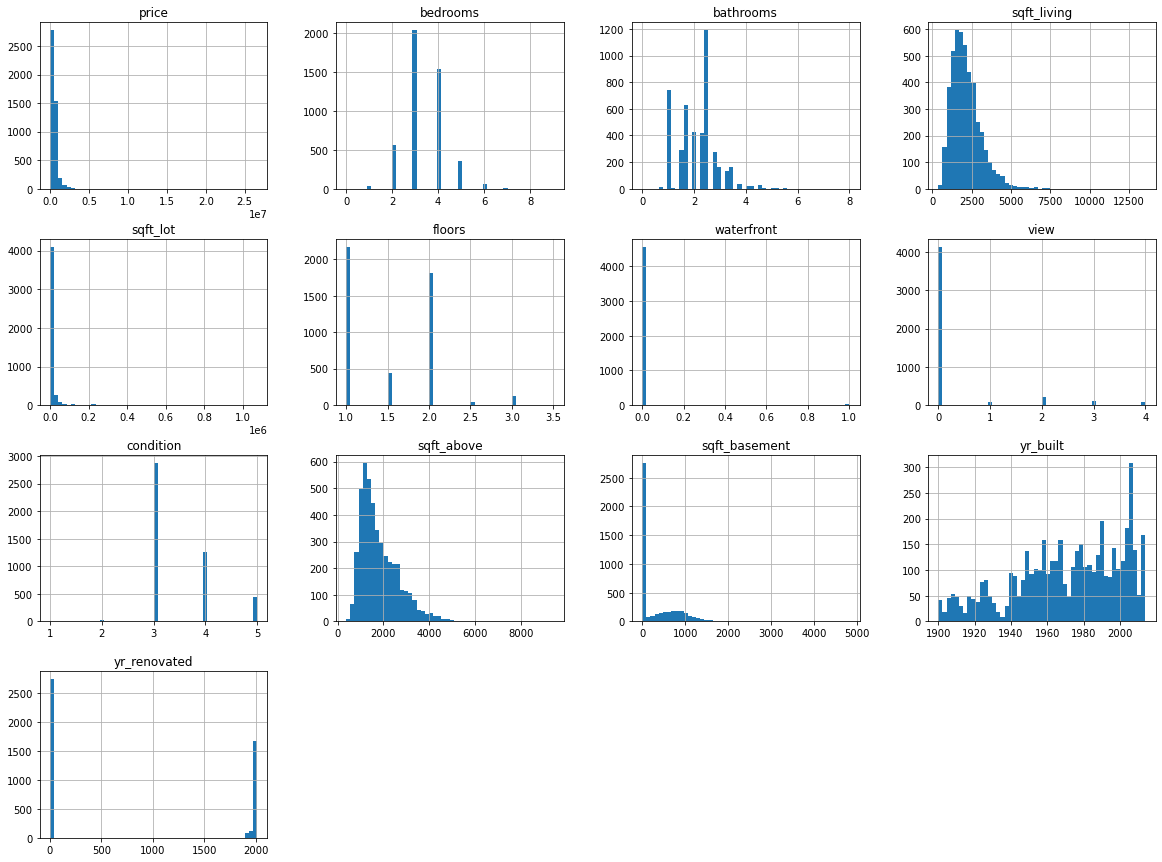

In [261]:
# visualizing distribution of each attribute.
%matplotlib inline
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

*Explaining noticeable traits for key attributes and their special treatment requirements (If needed).*

**1. Price**: There are some rows where price is marked as zero, It could be result of missing values or data being capped. This is causing distortion in the graph. Since this is target attribute, this noise can affect the estimator greatly. Removing these rows could be one solution. We cannot replace these with median as if in case the zero values are a result of capping the data, it will be even more detrimental to our estimator.

**2. bedrooms**, bathrooms don't show any noticeable traits.

**3. sqft_living, sqft_above** show tail heavy traits.

**4. sqft_lot:** This attribute has extreme values for the area of a property, some values are in lacs of sqft. We will consider these as correct values and not the noise. As in some remote areas, the property can be cheap. Other reason for extreme values could be that the scale was wrong for these property, ie instead of sqft, square inch was used. However these recorded values will be treated as correct scaled.

**5. waterfront:** very few houses have waterfront.

**7. sqft_basement:** majority of houses dont have basement hence marked with zero.

**8. yr_renovated:** Many of houses have zero value, which most likely means that it wasnt renovated. This is problematic. zero will make our estimator think that it was renovated 2000 years ago. Which is not good for our estimator. One possible solution for this is to replace yr_renovated with year_built value. As when a house is built it when it is renovated as well.



**Q5 Notice that some of the instances have a value of zero for the house price.  Write two functions.One that computes the mean house price from the non-zero instances.  One that computesthe median house price for the non-zero instances.  Note that you should not use the built-inmedian and mean functions to do this, but should compute it yourself.  You can, however,compare the result of your functions to the built-in functions to verify your implementation.**

In [262]:
import numpy as np

# get mean without considering zeros in data
def get_mean(nums):
    new_arr = nums[nums is not None and nums > 0]
    return sum(new_arr) / len(new_arr)

# get mean without considering zeros in data
def get_median(nums):
    new_arr = nums[nums is not None and nums > 0]
    new_arr.sort_values(inplace = True)
    new_arr.reset_index(inplace = True, drop = True)
    
    return new_arr[(len(new_arr)-1) // 2]

# replaces the zero values with mean
def replace_with_mean(nums):
    mean = get_mean(nums)
    nums.loc[nums is None or nums == 0] = mean
    
# replaces the zero values with the median
def replace_with_median(nums):
    median = get_median(nums)
    nums.loc[nums is None or nums == 0] = median
    
# Comparing the results with the numpy mean and median function. Please uncomment the code to view the results.


# Matching results with np.mean function    
# for column in housing_data.columns:
#     if "int" in str(type(housing_data[column][0])) or "float" in str(type(housing_data[column][0])):
#         new_arr = housing_data[column][housing_data[column] is not None and housing_data[column] > 0]
#         print(column + ": " + str(get_mean(housing_data[column]) - np.mean(new_arr))) 

# Matching results with np.median function    
# for column in housing_data.columns:
#     if "int" in str(type(housing_data[column][0])) or "float" in str(type(housing_data[column][0])):
#         new_arr = housing_data[column][housing_data[column] is not None and housing_data[column] > 0]
#         print(column + ": " + str(get_median(housing_data[column]) - np.median(new_arr))) 

**Q6: Create three instances of the dataset:  (1) that removes all instances of houses with prices of zero, (2) that replaces the zero-priced houses with the median price value from the non-zeropriced houses, using your median function from above and (3) that replaces the zero-priced houses with the mean price value from the non-zero priced houses,  using your mean value function above.  Generate histogram plots of the house prices for the four cases (e.g.  original,$0 priced homes removed, median replaced, and mean replaced).**

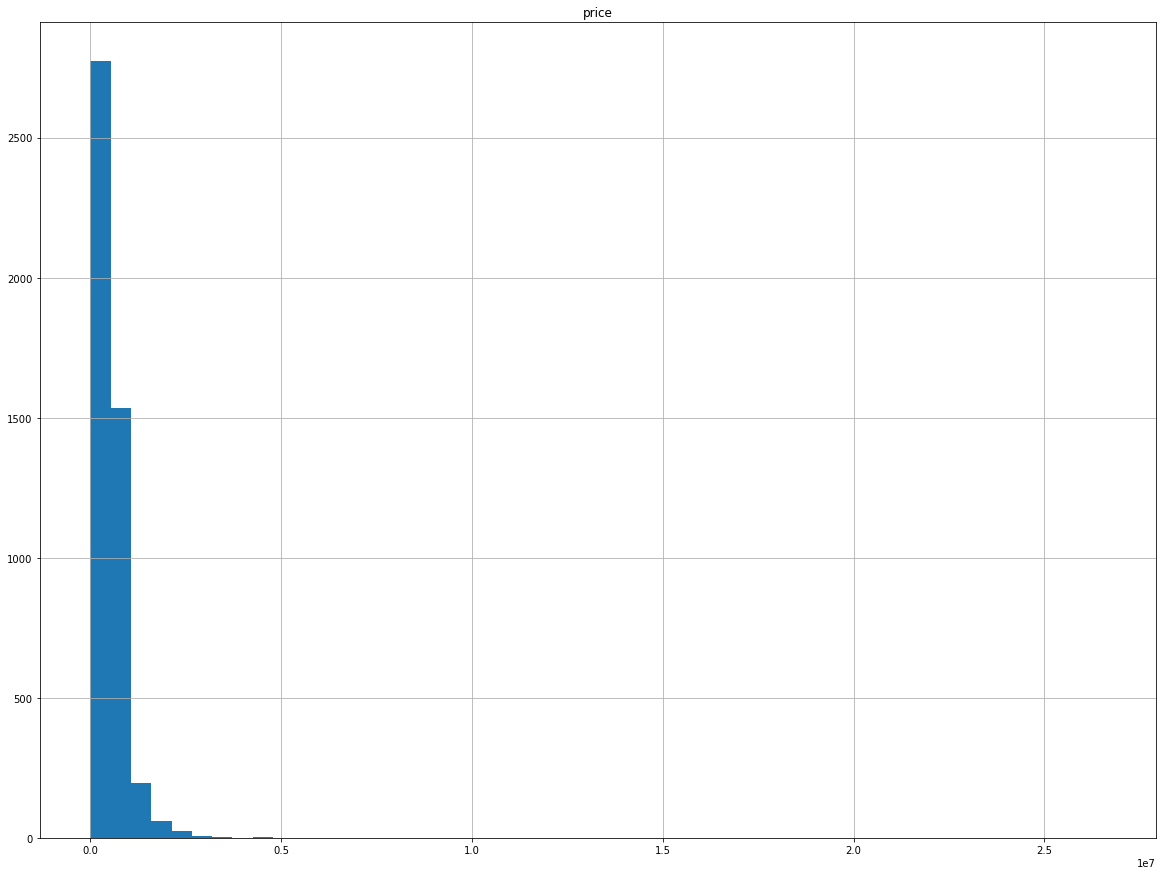

In [263]:
pd.options.mode.chained_assignment = None

# creating zero removed data set
zero_removed_housing_data = housing_data[housing_data["price"] != 0]

# Creating zeros replaced with mean dataset
mean_replaced_housing_data = housing_data.copy(deep=True)
replace_with_mean(mean_replaced_housing_data["price"])

# Creating zeros replaced with median dataset
median_replaced_housing_data = housing_data.copy(deep=True)
replace_with_median(median_replaced_housing_data["price"])


#Code to compare the mean and median among all 4 instances of data.

# print(get_mean(housing_data["price"]))
# print(get_median(housing_data["price"]))

# print(housing_data[["price"]].describe())
# print(zero_removed_housing_data[["price"]].describe())
# print(mean_replaced_housing_data[["price"]].describe())
# print(median_replaced_housing_data[["price"]].describe())

# Plotting the price distribution in the original data
housing_data[["price"]].hist(bins=50, figsize=(20,15))
plt.show()

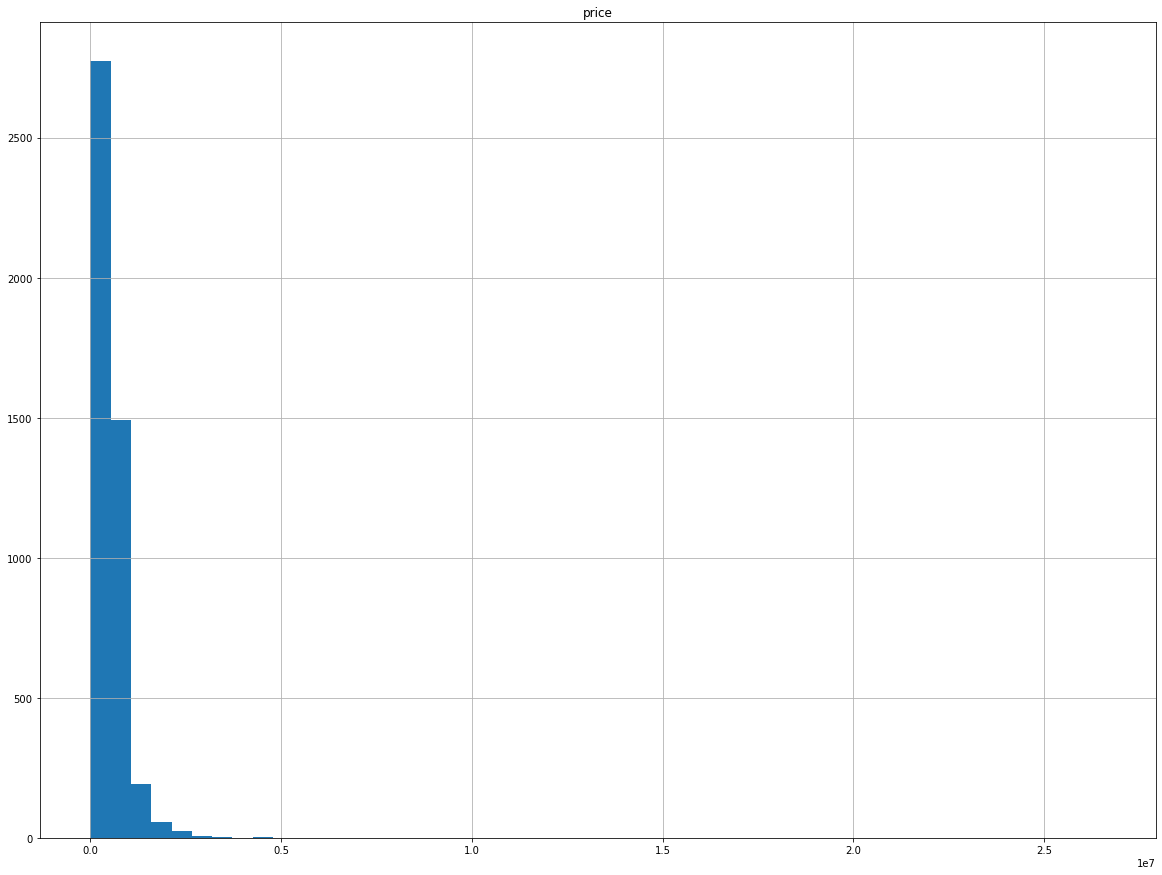

In [264]:
# Plotting the price distribution in the zero removed price data
zero_removed_housing_data[["price"]].hist(bins=50, figsize=(20,15))
plt.show()

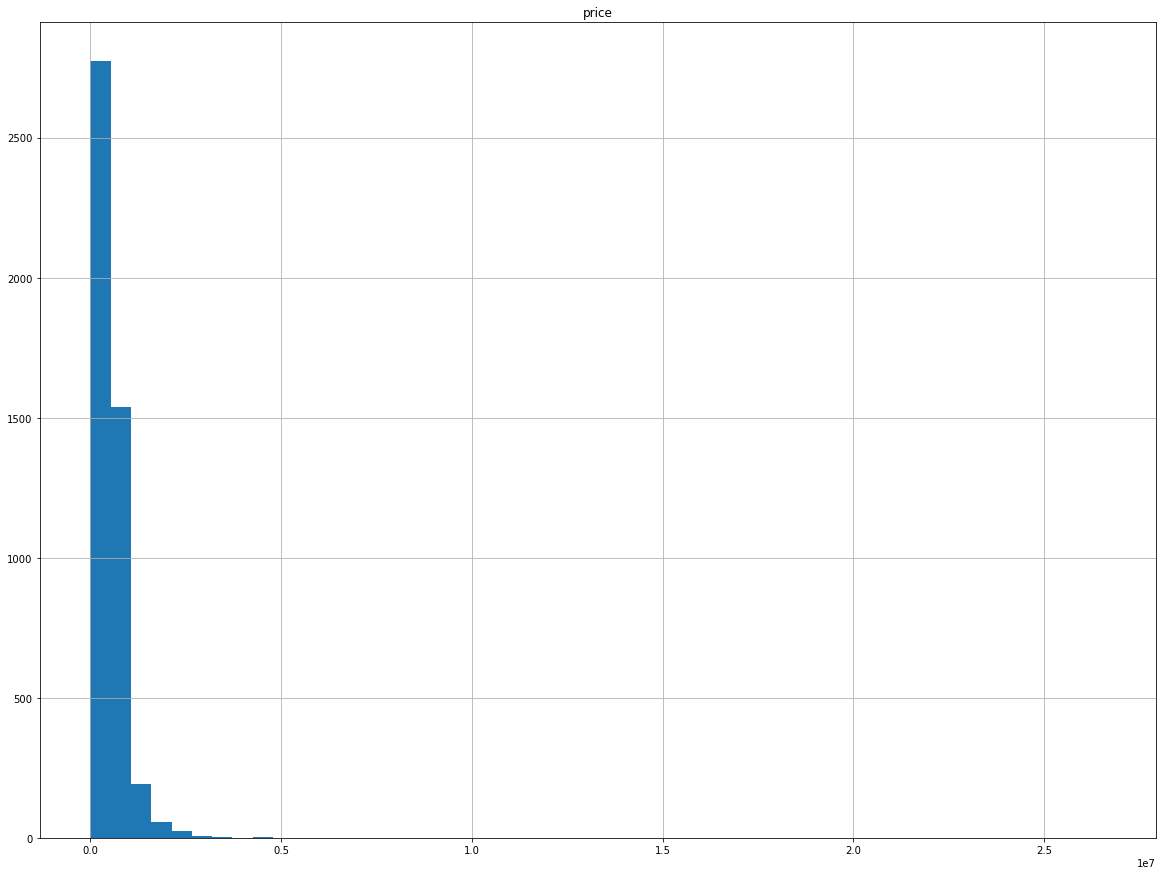

In [265]:
# Plotting the price distribution in the zero replaced with mean data
mean_replaced_housing_data[["price"]].hist(bins=50, figsize=(20,15))
plt.show()

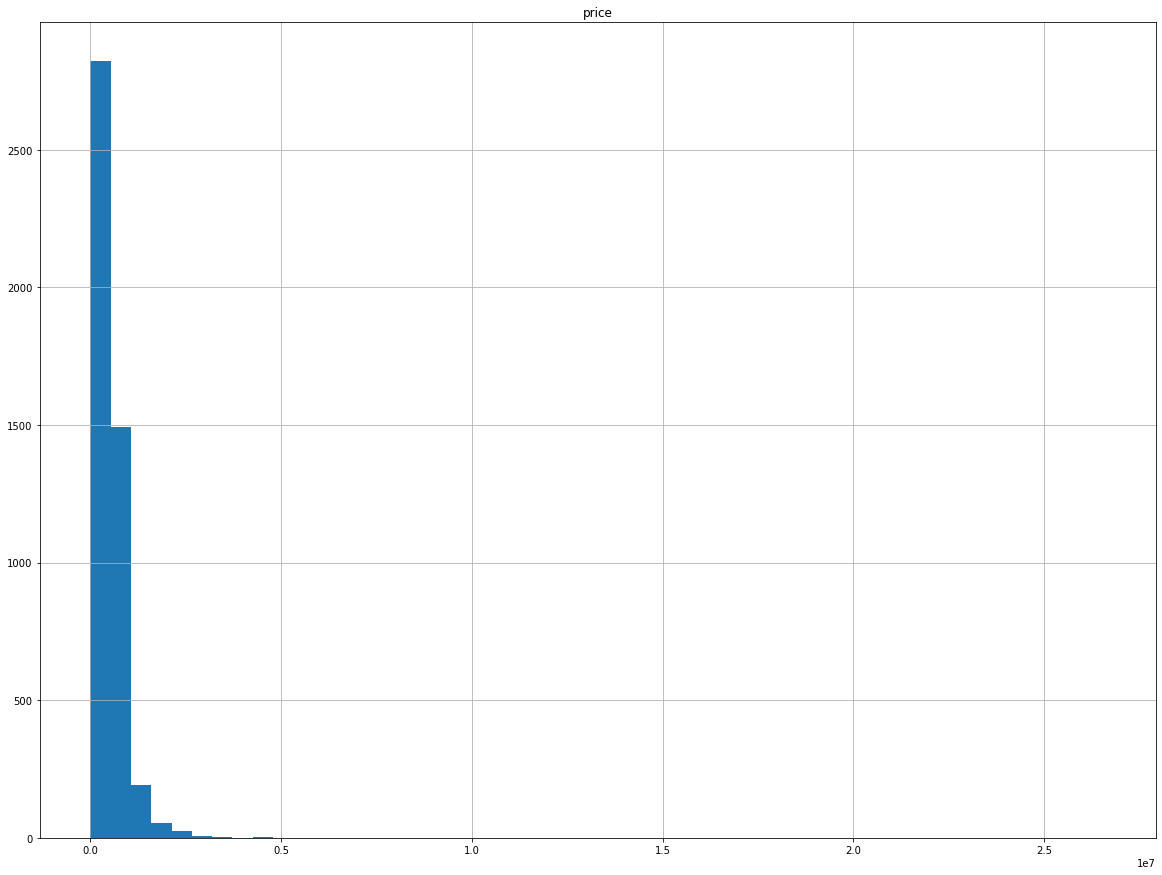

In [266]:
# Plotting the price distribution in the zeros replaced with median data
median_replaced_housing_data[["price"]].hist(bins=50, figsize=(20,15))
plt.show()

**Q7: For each of the above instances, visualize the dependency of the target on each continuous-valued feature (e.g.  2D scatter plot).  What features seem to be linearly correlated with the target?  What features do not have a correlation with the target?**

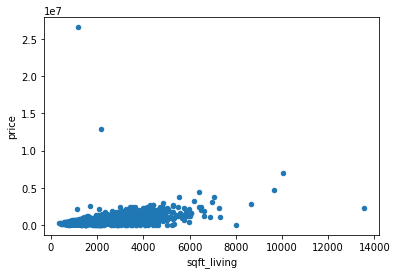

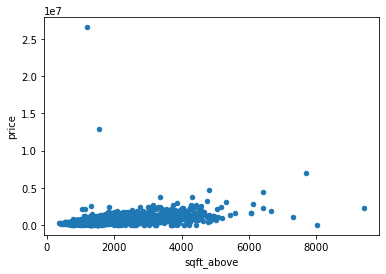

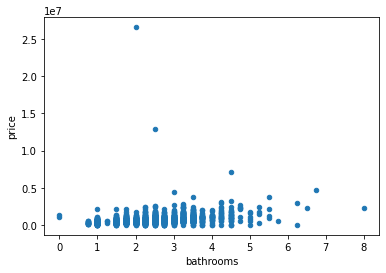

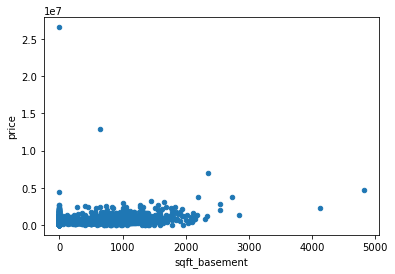

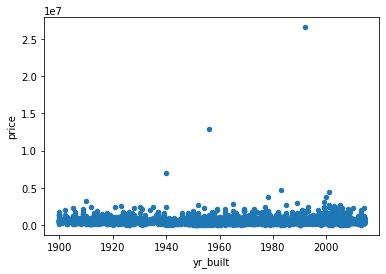

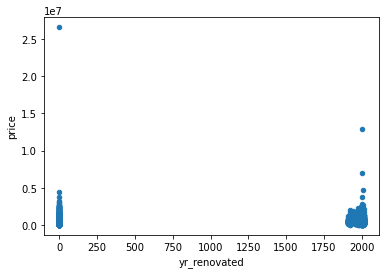

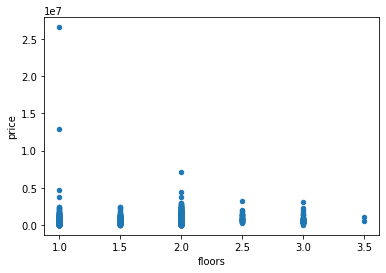

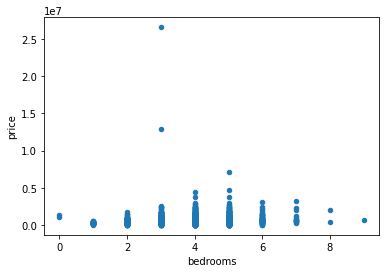

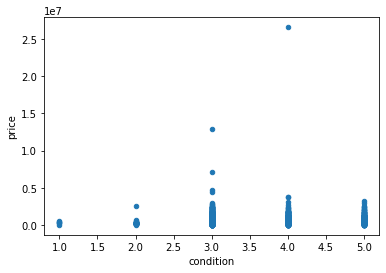

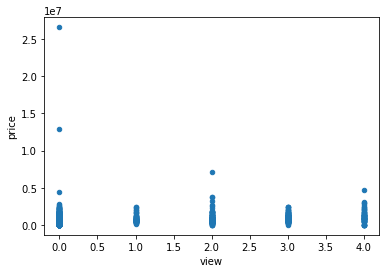

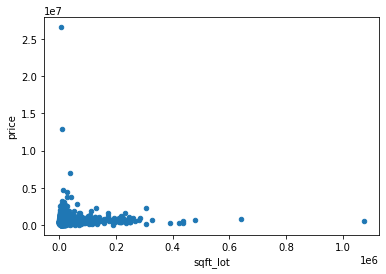

In [267]:
# all continuous variables
continuous_variables = ["sqft_living","sqft_above","bathrooms", "sqft_basement", "yr_built", "yr_renovated", "floors", "bedrooms", "condition", "view", "sqft_lot"]

# Function to visualize dependency of the target on continuous variables.
def plot_target_with_cont(data, target, cont_vars, alpha = 1):
    for var in cont_vars:
        data.plot(kind="scatter", x=var, y=target, alpha = alpha)

# plotting dependency of the target on continuous variables for original data
plot_target_with_cont(housing_data, "price", continuous_variables)



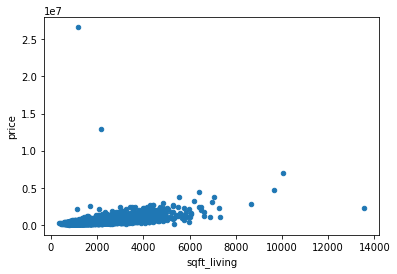

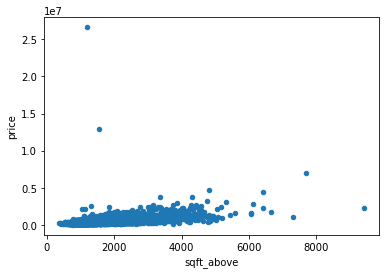

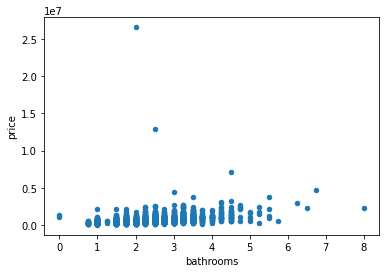

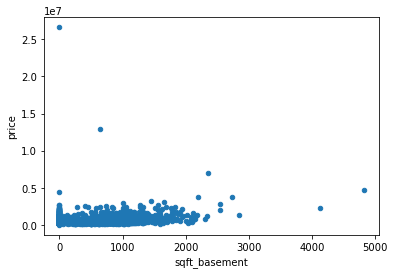

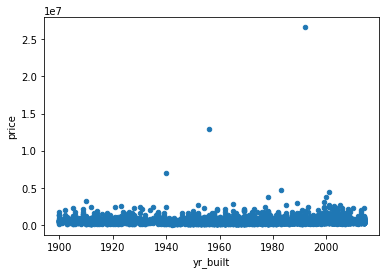

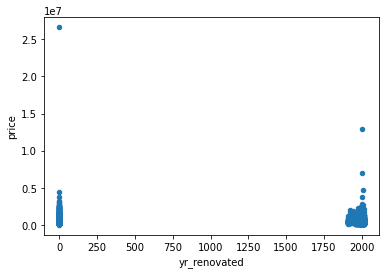

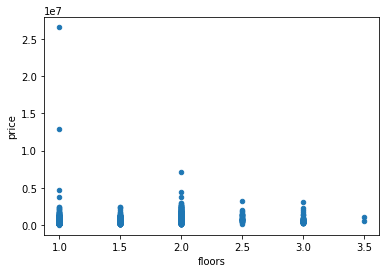

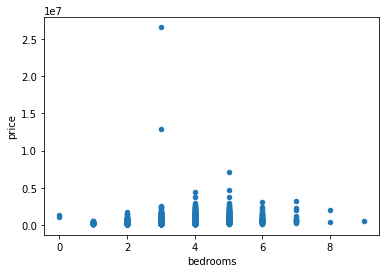

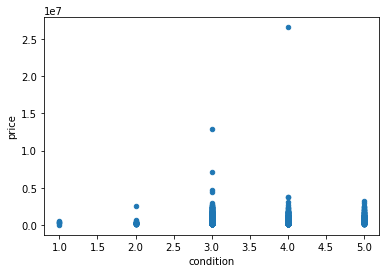

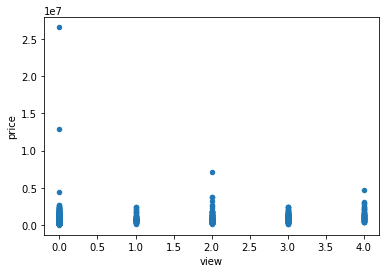

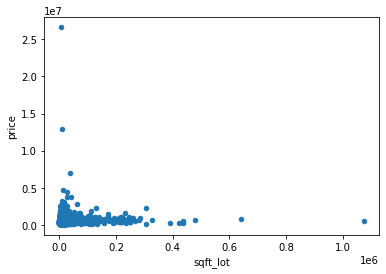

In [268]:
# plotting dependency of the target on continuous variables for zero removed data
plot_target_with_cont(zero_removed_housing_data, "price", continuous_variables)

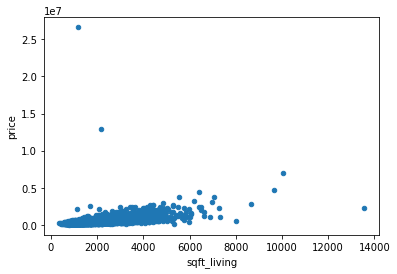

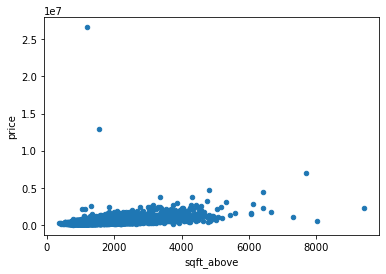

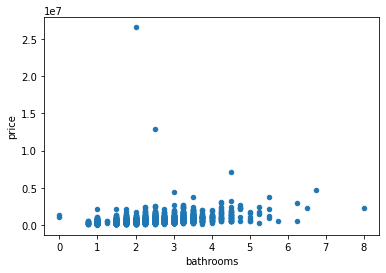

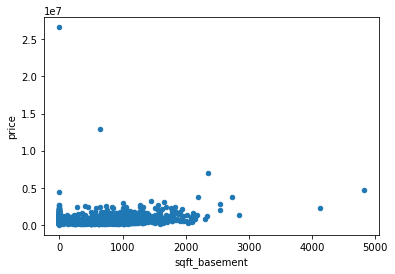

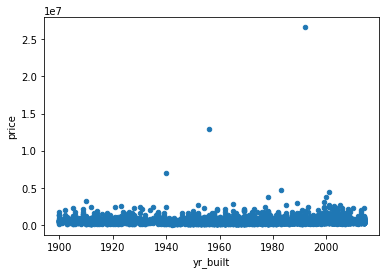

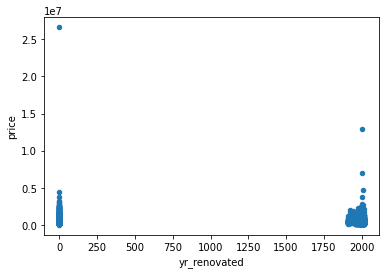

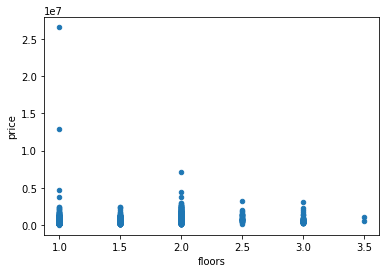

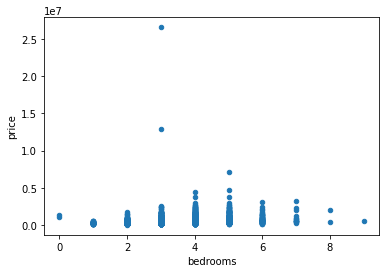

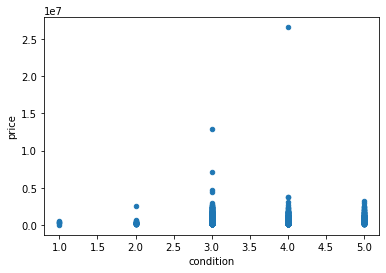

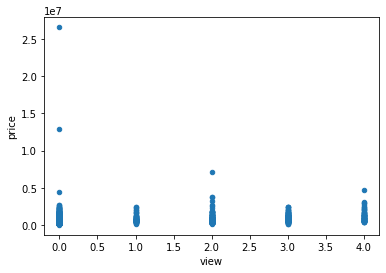

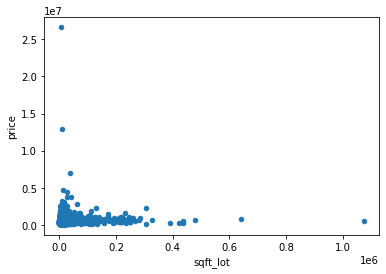

In [269]:
# plotting dependency of the target on continuous variables for replaced with mean data
plot_target_with_cont(mean_replaced_housing_data, "price", continuous_variables)

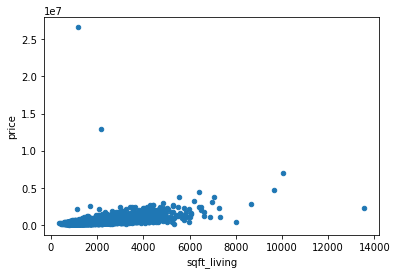

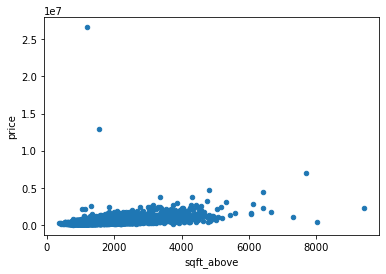

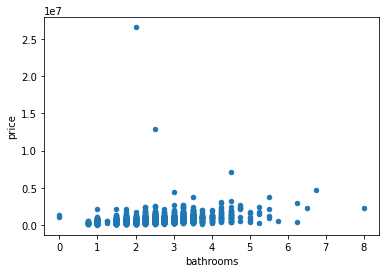

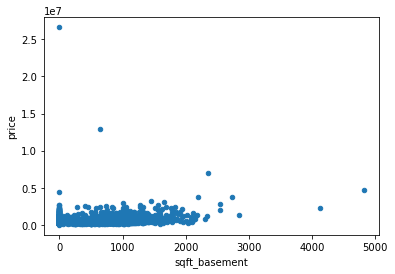

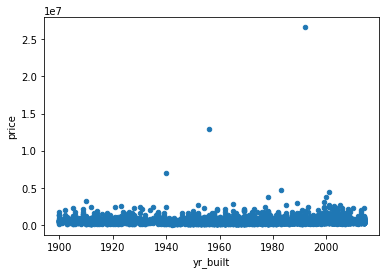

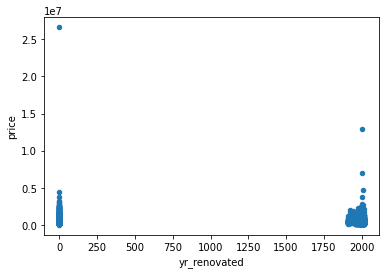

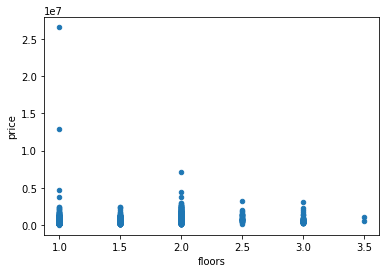

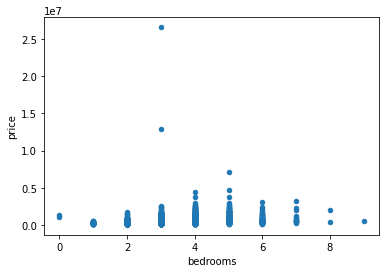

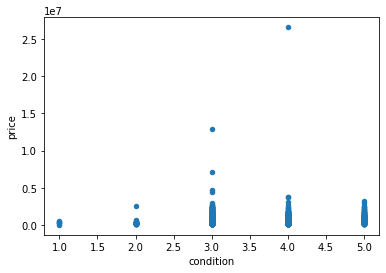

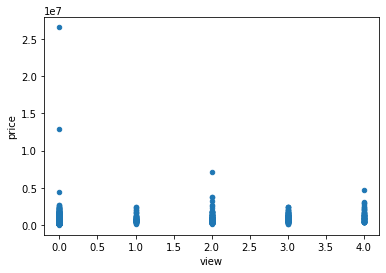

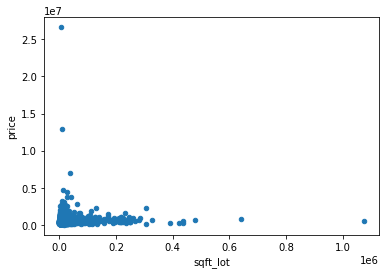

In [270]:
# plotting dependency of the target on continuous variables for replaced with median data
plot_target_with_cont(median_replaced_housing_data, "price", continuous_variables)

As seen in the plot features that seem to be linearly correlated with the price are 
sqft_living, sqft_above, bathrooms. This on the plot looks more like horizontal line with little slope. The slope value is low because, the scale of the price axis high.

Features that are not correlated with target(price) variable are: sqft_lot, condition, yr_built, yr_renovated. These variable do not tell much about price, whether the price can be high or low if value for these is high or low. 

**Q8 Write your own function that computes the correlation coefficient between the target and the continuous valued features.  Do the resulting correlation coefficients agree with your visual inspection of linear correlation?  Why or why not?  How do the correlation coefficients differ for each set (e.g.  original, $0 priced homes removed, median replaced, and mean replaced)?**

In [271]:
# Calculates the true mean which considers the zeros as well
def get_true_mean(values):
    return sum(values) / len(values)

# Calculates the correlation of two attributes.
def get_correlation(data, value1, value2):
    mean1 = get_true_mean(data[value1])
    mean2 = get_true_mean(data[value2])
    
    sq_val1_sum = 0
    sq_val2_sum = 0
    mul_val_val2_sum = 0
    
    for i, row in data.iterrows():
        mul_val_val2_sum = mul_val_val2_sum + (row[value1] - mean1) * (row[value2] - mean2)
        sq_val1_sum = sq_val1_sum + (row[value1] - mean1) ** 2
        sq_val2_sum = sq_val2_sum + (row[value2] - mean2) ** 2
        
    return mul_val_val2_sum / (sq_val1_sum * sq_val2_sum) ** .5

# Prints the correlations of all the variables.
def print_correlations(data, target, cont_vars):
    for i in range(len(cont_vars)):
        print(cont_vars[i] + " : " + str(get_correlation(data, target, cont_vars[i])))

# Printing correlations in original data with the price.
print("Original data correlations:")
print_correlations(housing_data, "price", continuous_variables)

Original data correlations:
sqft_living : 0.4304100254326292
sqft_above : 0.3675696016004266
bathrooms : 0.32710991828773556
sqft_basement : 0.21042657177482635
yr_built : 0.021856830395478952
yr_renovated : -0.028773645398858096
floors : 0.15146080053677977
bedrooms : 0.20033628937567527
condition : 0.034914537326412934
view : 0.22850417280566584
sqft_lot : 0.05045129503234898


The resulting correlation coeffiecient of the sqft_living, sqft_above, bathrooms although not very close to 1, but its still higher than other variables. This was also visible in the almost linear plot between these variables and the price above.

Similarly for variables sqft_lot, yr_built, condition, yr_renovated is close to zero. Which matches our previous observations through the plots. 

In [272]:
# Printing correlations in zero removed data with the price.
print("\n\nZero Removed data Correlation")
print_correlations(zero_removed_housing_data, "price", continuous_variables)

# Printing correlations in zero replaced with mean data with the price.
print("\n\nMean replaced data Correlation")
print_correlations(mean_replaced_housing_data, "price", continuous_variables)

# Printing correlations in zero replaced with median data with the price.
print("\n\nMedian replaced data Correlation")
print_correlations(median_replaced_housing_data, "price", continuous_variables)



Zero Removed data Correlation
sqft_living : 0.4454937084813834
sqft_above : 0.38066094088424746
bathrooms : 0.3411259150673863
sqft_basement : 0.21778232590197197
yr_built : 0.02175681028814934
yr_renovated : -0.029033735402445502
floors : 0.1527583079732681
bedrooms : 0.21022759193999252
condition : 0.038891721308885234
view : 0.24258746530740485
sqft_lot : 0.05134733007374802


Mean replaced data Correlation
sqft_living : 0.43977549019082773
sqft_above : 0.3752390608821419
bathrooms : 0.33608743194352847
sqft_basement : 0.21561579258280153
yr_built : 0.021661139867392046
yr_renovated : -0.02887885633451213
floors : 0.15201094900664483
bedrooms : 0.20812611844186144
condition : 0.03856574371902259
view : 0.23725196739069465
sqft_lot : 0.05118640895582616


Median replaced data Correlation
sqft_living : 0.43852523913649255
sqft_above : 0.3742261140852824
bathrooms : 0.33482731716787567
sqft_basement : 0.21490281560445024
yr_built : 0.021709517223893197
yr_renovated : -0.0288820788584

The correlation coeffiecients do not change much, that is because there are very few rows where price value was zero, so the overall effect of changing those cells on correlation was miniscule. Similarly for mean and median, the correlation hasnt changed much after the replacement.

This is good, because modifying the data has not introduced new relation between data.

**Q9 Use OneHotEncoder to encode each variable that you deem should be converted, for each dataset (e.g.  original, $0 priced homes removed, median replaced, and mean replaced).  For each variable that you encode, provide a rationale or justification for why it needs to be encoded.Also, provide a rationale for the variables that you choose not to encode.**

In [273]:
# One hot encoding statezip column of the original data
housing_data_one_hot = pd.get_dummies(housing_data["statezip"], prefix="statezip")

# One hot encoding statezip column of the zero removed data
zero_removed_one_hot = pd.get_dummies(zero_removed_housing_data["statezip"], prefix="statezip")

# One hot encoding statezip column of the zero replaced with mean data
mean_replaced_one_hot = pd.get_dummies(mean_replaced_housing_data["statezip"], prefix="statezip")

# One hot encoding statezip column of the zero replaced with median data
median_replaced_data_one_hot = pd.get_dummies(median_replaced_housing_data["statezip"], prefix="statezip")

# Sample data after one hot encoding
print(housing_data_one_hot)

      statezip_WA 98001  statezip_WA 98002  statezip_WA 98003  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
4595                  0                  0                  0   
4596                  0                  0                  0   
4597                  0                  0                  0   
4598                  0                  0                  0   
4599                  0                  0                  0   

      statezip_WA 98004  statezip_WA 98005  statezip_WA 98006  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0 

There are 2 columns containing categorical values: city, statezip. city has 44 distinct values and statezip has 77 distinct values. statezip column already has information regarding city. That is why onehotencoding only statezip column should suffice. Another reason to consider only statezip is that, some data sets have missing city value, while statezip data for those rows is present, that further makes encoding only statezip column beneficial.

However since there are large number of categories and in the real world data we might get additional values for statezip column. That would cause more features in our data than we expect. This may slow down training and degrade the performance. according to the recommended book(hands on ml) page 71.

**Q10 For the continuous variables and the ones where one-hot encoding is not applied, separately perform normalization (min-max scaling) and standardization for each of these variables, foreach dataset.  Hence, you should have eight different versions of the dataset after this step.Show and verify that the data has been converted correctly in each case.**

In [274]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Function which scales the data of given continuous columns; and returns a new dataframe
def get_scaled_data(scalar, df, columns):
    new_data = scalar.fit_transform(df[columns])
    new_dataframe = pd.DataFrame(new_data, index=df.index, columns=columns)    
    return new_dataframe


# Min max scaling all 4 data sets
min_max_scalar = MinMaxScaler()

housing_min_max = get_scaled_data(min_max_scalar, housing_data, continuous_variables + ["price"])
zero_rem_housing_min_max = get_scaled_data(min_max_scalar, zero_removed_housing_data, continuous_variables + ["price"])
mean_rep_housing_min_max = get_scaled_data(min_max_scalar, mean_replaced_housing_data, continuous_variables + ["price"])
median_rep_housing_min_max = get_scaled_data(min_max_scalar, median_replaced_housing_data, continuous_variables + ["price"])

# Standard scaling all the 4 data sets
standard_scalar = StandardScaler()

housing_standard = get_scaled_data(standard_scalar, housing_data, continuous_variables + ["price"])
zero_rem_housing_standard = get_scaled_data(standard_scalar, zero_removed_housing_data, continuous_variables + ["price"])
mean_rep_housing_standard = get_scaled_data(standard_scalar, mean_replaced_housing_data, continuous_variables + ["price"])
median_rep_housing_standard = get_scaled_data(standard_scalar, median_replaced_housing_data,
                                             continuous_variables + ["price"])

# Min and max value of min-max scaled data should be between zero and one.
print("\n\nhousing_min_max")
print(housing_min_max.describe())
print("\n\nzero_rem_housing_min_max")
print(zero_rem_housing_min_max.describe())
print("\n\nmean_rep_housing_min_max")
print(mean_rep_housing_min_max.describe())
print("\n\nmedian_rep_housing_min_max")
print(median_rep_housing_min_max.describe())


# Standard scaled data set should have unit variance
print("\n\nhousing_standard")
print(housing_standard.var())
print("\n\nzero_rem_housing_standard")
print(zero_rem_housing_standard.var())
print("\n\nmean_rep_housing_standard")
print(mean_rep_housing_standard.var())
print("\n\nmedian_rep_housing_standard")
print(median_rep_housing_standard.var())




housing_min_max
       sqft_living   sqft_above    bathrooms  sqft_basement     yr_built  \
count  4600.000000  4600.000000  4600.000000    4600.000000  4600.000000   
mean      0.134347     0.161202     0.270102       0.064747     0.620932   
std       0.073136     0.095373     0.097973       0.096294     0.260806   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%       0.082764     0.090708     0.218750       0.000000     0.447368   
50%       0.122248     0.134956     0.281250       0.000000     0.666667   
75%       0.170843     0.213496     0.312500       0.126556     0.850877   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

       yr_renovated       floors     bedrooms    condition         view  \
count   4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean       0.401494     0.204826     0.377874     0.612935     0.060163   
std        0.486303     0.215315     0.100983     0.169307     0.194601 

*Verifying the transformation*

As we can see from the output of describe, the min and max value for min-max scaled data is not less than zero and not more than one, so our data has been transformed correctly by our scaler.

Standard scaler also the data has unit variance as can be seen from the output and the data contains negative values as well as can be seen in the head output of dataframe.

In [275]:
# Printing the sample data after transformation.
print("\n\n Sample data: median_rep_housing_standard")
print(median_rep_housing_standard.head())



 Sample data: median_rep_housing_standard
   sqft_living  sqft_above  bathrooms  sqft_basement  yr_built  yr_renovated  \
0    -0.829971   -0.565224  -0.843204      -0.672464 -0.531014      1.221670   
1     1.568528    1.789559   0.432802      -0.069128 -1.674693     -0.825693   
2    -0.217367    0.119171  -0.205201      -0.672464 -0.161000     -0.825693   
3    -0.144686   -0.959621   0.113800       1.482306 -0.261913     -0.825693   
4    -0.206984   -0.797222   0.432802       1.051352  0.175376      1.208396   

     floors  bedrooms  condition      view  sqft_lot     price  
0 -0.022416 -0.441122  -0.667112 -0.309194 -0.193434 -0.434837  
1  0.906555  1.759705   2.286416  4.830079 -0.161718  3.257195  
2 -0.951388 -0.441122   0.809652 -0.309194 -0.080978 -0.383137  
3 -0.951388 -0.441122   0.809652 -0.309194 -0.190145 -0.244085  
4 -0.951388  0.659291   0.809652 -0.309194 -0.121306 -0.012330  


**Q11: For each data set (eight in total), us Scikit-learns KFold object to generate 10 folds of trainingand testing sets for cross validation.  Be sure to set the random state variable.  For each fold,train a Linear Regression model (see chapter 2 of ”Hands-on Machine Learning...”) using the training data.  Then make predictions of the housing prices of the test data, using the trainedmodel.**

In [276]:
from sklearn.model_selection import train_test_split

# Standard Spliting the data into test and train data for each data set. 20% of the dataset is kept aside for test data
org_train_min_max, org_test_min_max = train_test_split(housing_min_max, test_size=0.2, random_state=42)
zero_train_min_max, zero_test_min_max = train_test_split(zero_rem_housing_min_max, test_size=0.2, random_state=42)
mean_train_min_max, mean_test_min_max = train_test_split(mean_rep_housing_min_max, test_size=0.2, random_state=42)
median_train_min_max, median_test_min_max = train_test_split(median_rep_housing_min_max, test_size=0.2, random_state=42)

# MinMax Spliting the data into test and train data for each data set. 20% of the dataset is kept aside for test data
org_train_standard, org_test_standard = train_test_split(housing_standard, test_size=0.2, random_state=42)
zero_train_standard, zero_test_standard = train_test_split(zero_rem_housing_standard, test_size=0.2, random_state=42)
mean_train_standard, mean_test_standard = train_test_split(mean_rep_housing_standard, test_size=0.2, random_state=42)
median_train_standard, median_test_standard = train_test_split(median_rep_housing_standard, test_size=0.2, random_state=42)

print("Train shape: Test shape")
print(str(org_train_min_max.shape) + ": " + str(org_test_min_max.shape))
print(str(zero_train_min_max.shape) + ": " + str(zero_test_min_max.shape))
print(str(mean_train_min_max.shape) + ": " + str(mean_test_min_max.shape))
print(str(median_train_min_max.shape) + ": " + str(median_test_min_max.shape))
print(str(org_train_standard.shape) + ": " + str(org_test_standard.shape))
print(str(zero_train_standard.shape) + ": " + str(zero_test_standard.shape))
print(str(mean_train_standard.shape) + ": " + str(mean_test_standard.shape))
print(str(median_train_standard.shape) + ": " + str(median_test_standard.shape))

Train shape: Test shape
(3680, 12): (920, 12)
(3640, 12): (911, 12)
(3680, 12): (920, 12)
(3680, 12): (920, 12)
(3680, 12): (920, 12)
(3640, 12): (911, 12)
(3680, 12): (920, 12)
(3680, 12): (920, 12)


As seen in the shape of the test and train data, the test data has 20% of all the rows.

In [277]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

features = housing_min_max.columns.tolist()
features.remove("price")

# Function that takes the train data, applies the Kfold, trains on folds, makes the prediction on test data.
def get_preds(train_data, test_data, regressor):
    
    # Creating K folds, k = 10
    folds = KFold(n_splits=10, random_state = 42, shuffle = True)
    X_train = train_data[features]
    y_train = train_data[["price"]]

    X_test = test_data[features]
    y_test = test_data[["price"]]

    for train_index, test_index in folds.split(X_train, y_train):
        X_train_folds = X_train.iloc[train_index]
        y_train_folds = y_train.iloc[train_index]
        X_test_fold = X_train.iloc[test_index]
        y_test_fold = y_train.iloc[test_index]
        
        # Training on the train set of kfold
        regressor.fit(X_train_folds, y_train_folds)
        
        # testing on the test set of kfold
        y_pred = regressor.predict(X_test_fold)

    return regressor.predict(X_test)

# Training regressor and getting prediction for each dataset. data is trained on LinearRefressor.
org_min_max_preds = get_preds(org_train_min_max, org_test_min_max, LinearRegression())
zero_min_max_preds = get_preds(zero_train_min_max, zero_test_min_max, LinearRegression())
mean_min_max_preds = get_preds(mean_train_min_max, mean_test_min_max, LinearRegression())
median_min_max_preds = get_preds(median_train_min_max, median_test_min_max, LinearRegression())

org_standard_preds = get_preds(org_train_standard, org_test_standard, LinearRegression())
zero_standard_preds = get_preds(zero_train_standard, zero_test_standard, LinearRegression())
mean_standard_preds = get_preds(mean_train_standard, mean_test_standard, LinearRegression())
median_standard_preds = get_preds(median_train_standard, median_test_standard, LinearRegression())


**Q12 Write a function to compute the mean absolute error and mean square error for each fold ofeach data set.  Report the results and discuss how different factors may have contributed tothe final results.**

In [278]:
# Calculating mean absolute error for predicted values and true values
def get_mae(y_true, y_pred):
    diff = 0
    for i in range(len(y_true)):
        diff = diff + abs(y_true[i][0] - y_pred[i][0])
    return diff/len(y_true)

# Calculating mean square error for predicted values and true values
def get_mse(y_true, y_pred):
    diff = 0
    for i in range(len(y_true)):
        diff = diff + (y_true[i][0] - y_pred[i][0]) ** 2
    return diff/len(y_true)

print("\n\n-------------Min Max errors-----------")

print("mae original data min max : " + str(get_mae(org_test_min_max[["price"]].values ,org_min_max_preds)))
print("mse original data min max : " + str(get_mse(org_test_min_max[["price"]].values ,org_min_max_preds)))
print("mae zero removed min max : " + str(get_mae(zero_test_min_max[["price"]].values ,zero_min_max_preds)))
print("mse zero removed min max : " + str(get_mse(zero_test_min_max[["price"]].values ,zero_min_max_preds)))
print("mae mean replaced min max : " + str(get_mae(mean_test_min_max[["price"]].values ,mean_min_max_preds)))
print("mse mean replaced min max : " + str(get_mse(mean_test_min_max[["price"]].values ,mean_min_max_preds)))
print("mae median replaced min max : " + str(get_mae(median_test_min_max[["price"]].values ,median_min_max_preds)))
print("mse median replaced min max : " + str(get_mse(median_test_min_max[["price"]].values ,median_min_max_preds)))

print("\n\n-------------Standard errors-----------")

print("mae orginal standard : " + str(get_mae(org_test_standard[["price"]].values ,org_standard_preds)))
print("mse orginal standard : " + str(get_mse(org_test_standard[["price"]].values ,org_standard_preds)))
print("mae zero replaced standard : " + str(get_mae(zero_test_standard[["price"]].values ,zero_standard_preds)))
print("mse zero replaced standard : " + str(get_mse(zero_test_standard[["price"]].values ,zero_standard_preds)))
print("mae mean replaced standard : " + str(get_mae(mean_test_standard[["price"]].values ,mean_standard_preds)))
print("mse mean replaced standard : " + str(get_mse(mean_test_standard[["price"]].values ,mean_standard_preds)))
print("mae median replaced standard : " + str(get_mae(median_test_standard[["price"]].values,median_standard_preds)))
print("mse median replaced standard : " + str(get_mse(median_test_standard[["price"]].values,median_standard_preds)))



-------------Min Max errors-----------
mae original data min max : 0.007965888817242276
mse original data min max : 0.001396917006009206
mae zero removed min max : 0.0061094480092031105
mse zero removed min max : 8.846540483942139e-05
mae mean replaced min max : 0.00784264997452728
mse mean replaced min max : 0.0013890402483799941
mae median replaced min max : 0.007854758947032092
mse median replaced min max : 0.001389830820900941


-------------Standard errors-----------
mae orginal standard : 0.37526506151451655
mse orginal standard : 3.1064019481643634
mae zero replaced standard : 0.28804661045671154
mse zero replaced standard : 0.19665670873424718
mae mean replaced standard : 0.371104028951097
mse mean replaced standard : 3.118978655745726
mae median replaced standard : 0.3716132496918057
mse median replaced standard : 3.120027244095633


As observed in the output: For min max scaled data the error is significantly lower than that of standard scaled data.
The minimum error observed is for zero removed data with MSE error. Which is equal to 0.000088. Highest error observed is for median replaced data with MSE evaluation function. which is equal to: 3.120027244095633

Best min-max data with mae: zero removed
Best min-max data with mse: zero removed
worst min-max data with mae: original data
worst min-max data with mse: original data

Best standard data with mae: zero replaced
Best standard data with mse: zero replaced
worst standard data with mae: original data
worst standard data with mse: median replaced

*As seen in the above worst and best analysis, the data with zero removed rows performed the best. This could mean that the missing data when replaced with mean and median was not truely representing the missing values. Overall since we do not have information regarding this data, it is best to remove the mising values instead of replacing it. Zero data was a noise in the data, and definitely not the true value which is the reason why original data performed the worst. Replacing zero's with mean and median diminished the effect of noise to some extent, however it was still not as effective as removing the data itself.*

*Between standard and min max scaling, we see that min-max is significantly better than standard scaling, this could be because the distribution of the data is not gaussian. We see that for price there are many values around thousands and some values approaching millions the distribution is not gaussian. This can also be observed in the plots of various columns. This could be one reason the min max scaling has performed better with this data.*

Mean and median replaced data, both performed very similarly on test data. as can be seen in the error output.